In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

df_train=pd.read_csv('train_set.csv') #to get train indices 
df_test=pd.read_csv('test_set.csv') #to get test indices 

df=pd.read_csv('week10_pptEDA.csv')

toremove=['day','month','year']#'pdays','employed','unemployed','year']#,'previous']
df.drop(toremove,axis=1,inplace=True)

train=df.loc[df_train.idx.tolist()]
test=df.loc[df_test.idx.tolist()]
display(df.columns)



Index(['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'euribor3m', 'euribor3m_ffill', 'consum_prices_rate', 'consum_conf_ind',
       'employed', 'unemployed', 'unemployed_rate', 'y_equiv',
       'contact_missing', 'poutcome_missing', 'job_missing',
       'education_missing', 'overdraft', 'divorced', 'married', 'single',
       'day_of_week1', 'day_of_week2', 'day_of_week3', 'day_of_week4',
       'day_of_week5', 'day_of_week6', 'day_of_week7', 'year1', 'year2',
       'year3', 'month1', 'month2', 'month3', 'month4', 'month5', 'month6',
       'month7', 'month8', 'month9', 'month10', 'month11', 'month12',
       'age_grp', 'rec', 'indebt'],
      dtype='object')

Do not touch categoric columns nor as transformation nor scaling
 Do not remove or scale what seems like outliers from economic indicators 


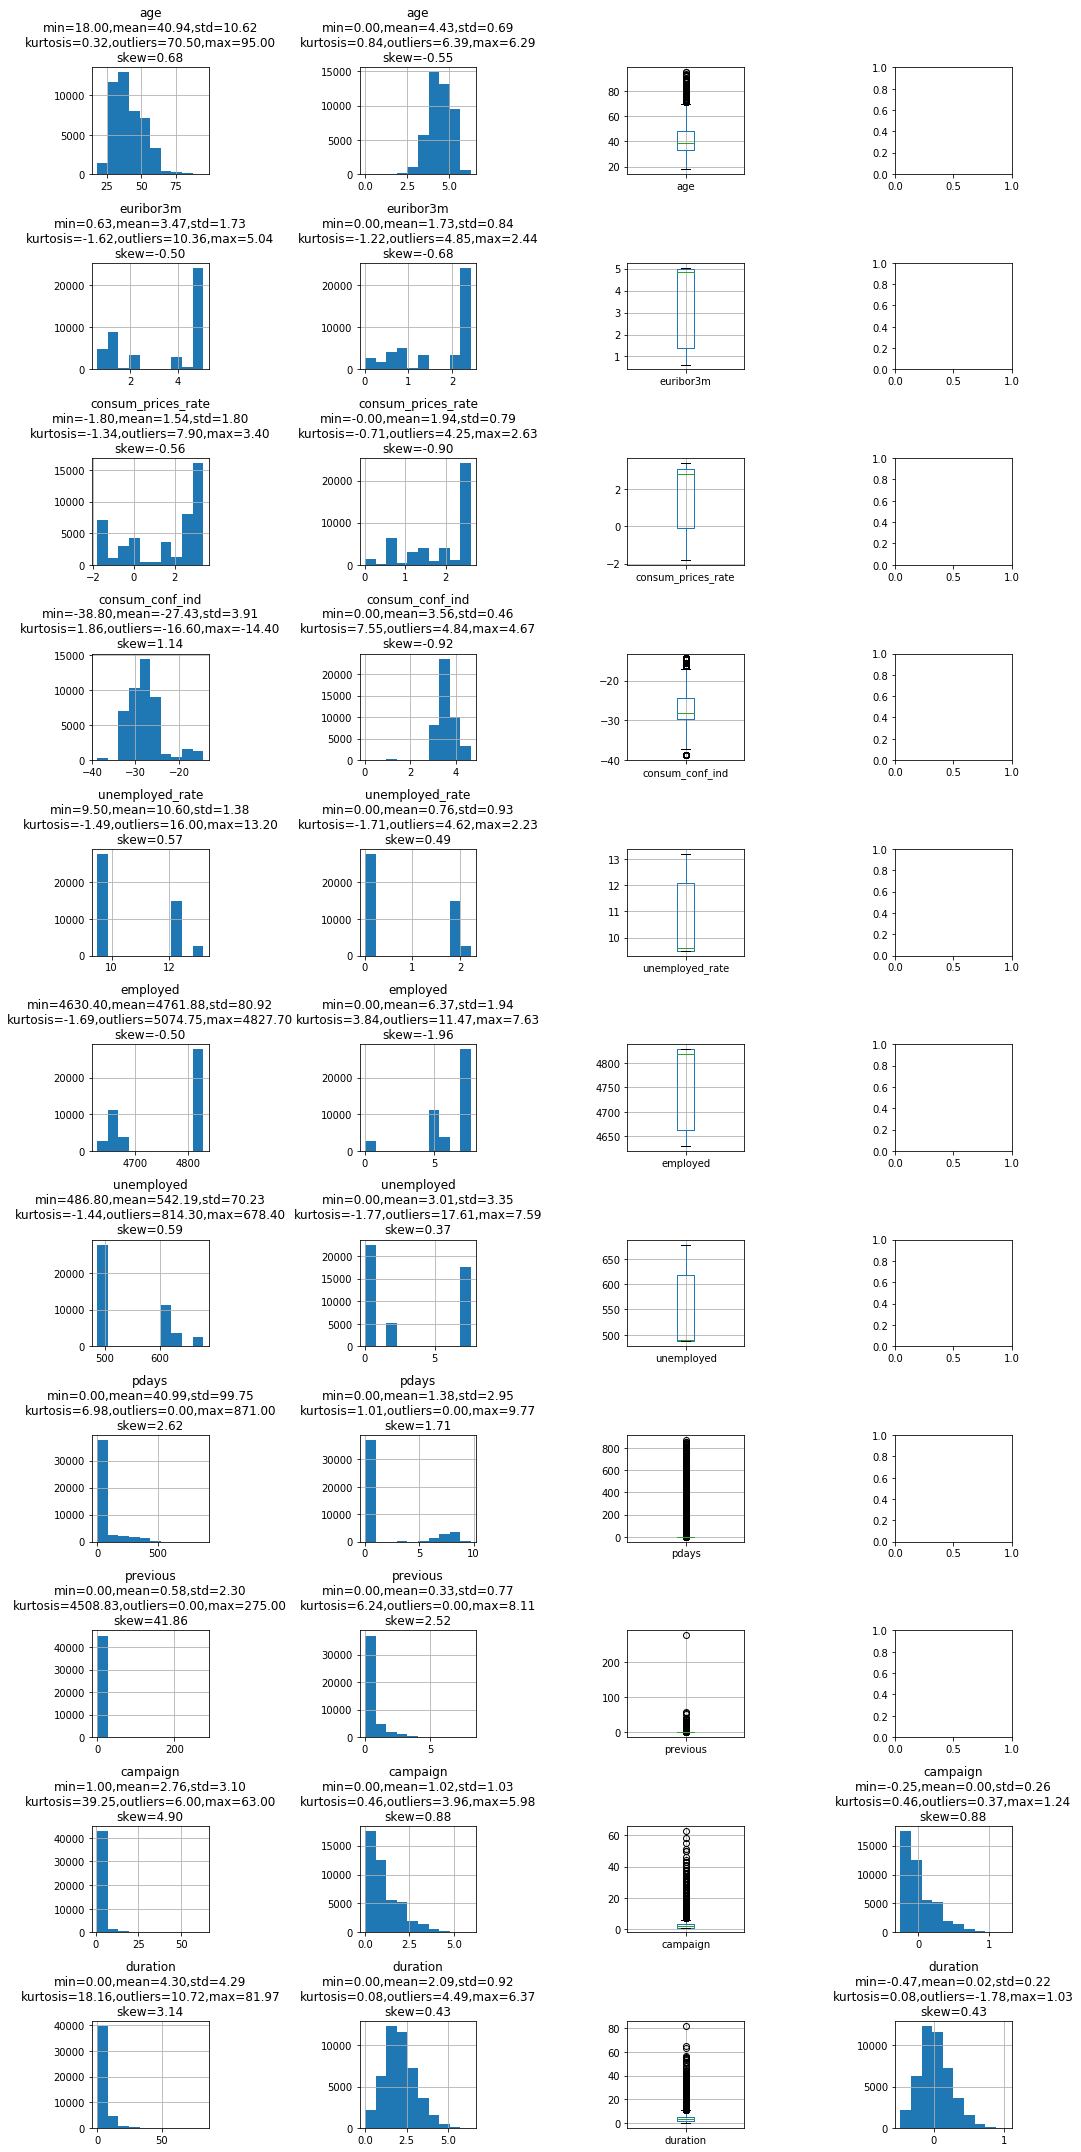

transformed and scaled statistics of features/n                 age     euribor3m  consum_prices_rate  consum_conf_ind  \
count  45206.000000  45206.000000        4.520600e+04     45206.000000   
mean       4.429986      1.729937        1.941338e+00         3.559198   
std        0.687287      0.844126        7.853027e-01         0.460993   
min        0.000000      0.000000       -3.203427e-16         0.000000   
25%        4.000000      0.791606        1.432959e+00         3.350497   
50%        4.459432      2.384602        2.485427e+00         3.548437   
75%        4.954196      2.413323        2.560715e+00         3.944858   
max        6.285402      2.435895        2.632268e+00         4.666757   

       unemployed_rate      employed    unemployed      previous  \
count     45206.000000  45206.000000  45206.000000  45206.000000   
mean          0.758996      6.373848      3.007279      0.326396   
std           0.928098      1.944962      3.352941      0.768930   
min          

In [10]:
non_categoric=['age', 'euribor3m', 'consum_prices_rate', 'consum_conf_ind', 'unemployed_rate','employed','unemployed','pdays','previous','campaign','duration']
targets=['y','y_equiv']
allbutcat=targets+non_categoric
categoric=df.columns[~df.columns.isin(allbutcat)].tolist()
features=df.columns[~df.columns.isin(targets)].tolist()

fig, axs = plt.subplots(nrows=len(non_categoric), ncols=4, figsize=(15, 30))
fig.subplots_adjust(wspace=0.9, hspace=0.9)

df_log=pd.DataFrame()

tocheckoutliers=['age','pdays','previous','campaign','duration']
for n in non_categoric:
    #print(n)
    idx=non_categoric.index(n)
    
    IQR=df[n].quantile(.75)-df[n].quantile(.25)
    lower=df[n].quantile(.25) - (1.5*IQR)# (Q1 - 1.5 * IQR)
    upper=df[n].quantile(.75) + (1.5*IQR)# (Q3 + 1.5 * IQR
    
    info=str('{}\nmin={:.2f},mean={:.2f},std={:.2f}\nkurtosis={:.2f},outliers={:.2f},max={:.2f}\nskew={:.2f}'.format(n,df[n].min(),df[n].mean(),df[n].std(),df[n].kurtosis(),upper,df[n].max(),df[n].skew()))    
    
    df[n].hist(ax=axs[idx,0])
    axs[idx,0].set_title(info)
    
    
    
    df_log[n]=np.log2(df[n]-(df[n].min()-1))
    
    IQR=df_log[n].quantile(.75)-df_log[n].quantile(.25)
    lower=df_log[n].quantile(.25) - (1.5*IQR)# (Q1 - 1.5 * IQR)
    upper=df_log[n].quantile(.75) + (1.5*IQR)# (Q3 + 1.5 * IQR)
    
    #print(n,df_log[n].min(),lower,upper,df_log[n].max())
    
    info_log=str('{}\nmin={:.2f},mean={:.2f},std={:.2f}\nkurtosis={:.2f},outliers={:.2f},max={:.2f}\nskew={:.2f}'.format(n,df_log[n].min(),df_log[n].mean(),df_log[n].std(),df_log[n].kurtosis(),upper,df_log[n].max(),df_log[n].skew()))    
    
    
    df_log[n].hist(ax=axs[idx,1])
    axs[idx,1].set_title(info_log)

    df.boxplot(column=n,ax=axs[idx,2])


print('Do not touch categoric columns nor as transformation nor scaling\n Do not remove or scale what seems like outliers from economic indicators ')

train_log=df_log.loc[df_train.idx.tolist()]
test_log=df_log.loc[df_test.idx.tolist()]


outliers_tohandle=['campaign','duration']

df_o=pd.DataFrame()

for n in outliers_tohandle:
    idx=non_categoric.index(n)
    robust=RobustScaler(quantile_range=(1,99)).fit(train_log[[n]])#
    df_o[n]=robust.transform(df_log[[n]]).flatten()

    IQR=df_o[n].quantile(.75)-df_log[n].quantile(.25)
    lower=df_o[n].quantile(.25) - (1.5*IQR)# (Q1 - 1.5 * IQR)
    upper=df_o[n].quantile(.75) + (1.5*IQR)# (Q3 + 1.5 * IQR)
    
    info_o=str('{}\nmin={:.2f},mean={:.2f},std={:.2f}\nkurtosis={:.2f},outliers={:.2f},max={:.2f}\nskew={:.2f}'.format(n,df_o[n].min(),df_o[n].mean(),df_o[n].std(),df_o[n].kurtosis(),upper,df_o[n].max(),df_o[n].skew()))    
    axs[idx,3].set_title(info_o)

    df_o[n].hist(ax=axs[idx,3])

    
plt.tight_layout()
plt.show()

df_log[outliers_tohandle]=df_o[outliers_tohandle]


df_opt=df[df.columns[~df.columns.isin(non_categoric)]].join(df_log)

# toignore=problematic+non_categoric
# print(toignore)#=problematic+non_categoric

# df_logs[problematic]=df[problematic]

# df_opt=df[df.columns[~df.columns.isin(toignore)]].join(df_logs)


df_opt.drop('pdays',axis=1,inplace=True)
non_categoric.remove('pdays')

print('transformed and scaled statistics of features/n',df_opt[non_categoric].describe())

# ################tc whether to do this step now or after log ????????????????????????????
# train=df_opt.loc[df_train.idx.tolist()]
# test=df_opt.loc[df_test.idx.tolist()]

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted, check_consistent_length
from sklearn.preprocessing import label_binarize
from sklearn.utils import check_matplotlib_support
from sklearn.base import is_classifier
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import (
    confusion_matrix,
    plot_confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    log_loss,
    roc_auc_score,
    SCORERS
)
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression #baseline for binary classification problems
from sklearn.ensemble import RandomForestClassifier # weak learners 
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold

train=df_opt.loc[df_train.idx.tolist()]
test=df_opt.loc[df_test.idx.tolist()]

X_train=train[train.columns[~train.columns.isin(['y', 'y_equiv','duration'])]].values
y_train=train.loc[:,(train.columns =='y_equiv')].y_equiv.astype('int32')

X_test=test[test.columns[~test.columns.isin(['y', 'y_equiv','duration'])]].values
y_test=test.loc[:,(test.columns =='y_equiv')].y_equiv.astype('int32')

scores = defaultdict(list)


In [12]:
## logistic regression --> scale non-categoric with minmax since non is gaussian except duration which isn't contextually correct to use anyway
#scaling necessary because of penality L2 that normalizes across rows not columns so they need to be relatable 
non_categoric.remove('duration')
df_lr=df_opt
# for i in non_categoric:
#     minmax=MinMaxScaler()
#     minmaxfit=minmax.fit(train[[i]])
#     tmp=minmax.transform(df_opt[i].values.reshape(-1, 1))
# #    info=str('{}\nmin={:.2f},mean={:.2f},std={:.2f}\nkurtosis={:.2f},outliers={:.2f},max={:.2f}\nskew={:.2f}'.format(i,df_opt[i].min(),df_opt[i].mean(),df_opt[i].std(),df_opt[i].kurtosis(),df_opt[i].quantile(.99),df_opt[i].max(),df_opt[i].skew()))      
# #     print(info,'\n')
#     df_lr[i]=tmp
features=df_lr.columns[~df_lr.columns.isin(['y', 'y_equiv'])]
for i in features.tolist():
    minmax=MinMaxScaler()
    minmaxfit=minmax.fit(train[[i]].values)
    tmp=minmax.transform(df_opt[i].values.reshape(-1, 1))
#    info=str('{}\nmin={:.2f},mean={:.2f},std={:.2f}\nkurtosis={:.2f},outliers={:.2f},max={:.2f}\nskew={:.2f}'.format(i,df_opt[i].min(),df_opt[i].mean(),df_opt[i].std(),df_opt[i].kurtosis(),df_opt[i].quantile(.99),df_opt[i].max(),df_opt[i].skew()))      
#     print(info,'\n')
    df_lr[i]=tmp

    
train_lr=df_lr.loc[df_train.idx.tolist()]
test_lr=df_lr.loc[df_test.idx.tolist()]

X_train_lr=train_lr[train_lr.columns[~train_lr.columns.isin(['y', 'y_equiv','duration'])]].values
y_train_lr=train_lr.loc[:,(train_lr.columns =='y_equiv')].y_equiv.astype('int32')

X_test_lr=test_lr[test_lr.columns[~test_lr.columns.isin(['y', 'y_equiv','duration'])]].values
y_test_lr=test_lr.loc[:,(test_lr.columns =='y_equiv')].y_equiv.astype('int32')
###############################################################

n_jobs = -1
random_state=11

clf=LogisticRegression(random_state=random_state, n_jobs=n_jobs, max_iter=4000)
pipe=Pipeline(steps=[('lr',clf)])

cv= RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=random_state)
#cv = StratifiedKFold(shuffle=True, n_splits=6, random_state=random_state)


# LogisticRegression().get_params().keys()
param_grid = [{
                'lr__penalty': ['l2','none'],
                'lr__class_weight': ['balanced'],
                'lr__solver': ['sag','newton-cg'],
                'lr__multi_class': ['multinomial','ovr'],
}]


gs=GridSearchCV(pipe, param_grid, scoring='precision',cv=cv)
gs.fit(X_train_lr, y_train_lr)

print('best parameters are',gs.best_params_)
start = time.time()

y_predict=gs.predict(X_test_lr)
y_prob = gs.predict_proba(X_test_lr) #model.predict_proba(X_test)[:,1]


scores["Classifier"].append('lr')

for metric in [log_loss]:
    score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
    scores[score_name].append(metric(y_test_lr, y_prob[:, 1]))


for metric in [accuracy_score,precision_score, recall_score, f1_score, roc_auc_score,r2_score]:#,calibration_curve_ece]:
    score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
    scores[score_name].append(metric(y_test_lr, y_predict))

scores
end = time.time()
scores['time'].append(end-start)
scores['bestmodel'].append(gs.best_params_)


score_df = pd.DataFrame(scores).set_index("Classifier")
score_df.round(decimals=3)

score_df  
#y_prob[:,1]=y_predict

best parameters are {'lr__class_weight': 'balanced', 'lr__multi_class': 'ovr', 'lr__penalty': 'l2', 'lr__solver': 'sag'}


,Log loss,Accuracy,Precision,Recall,F1,Roc auc,R2,time,bestmodel
Classifier,,,,,,,,,
lr,0.514867,0.828688,0.358833,0.629344,0.457063,0.741914,-0.688654,0.078,"{'lr__class_weight': 'balanced', 'lr__multi_cl..."


In [13]:
## logisitc regression train w/o missing entries , expected to improve 

cols=['contact','poutcome','job','education','euribor3m']

X_miss=train#_lr
locs=[]

for c in cols:
    if c=='euribor3m':
        cmiss=c+'_ffill'
    else:
        cmiss=c+'_missing'
    tmp=X_miss.loc[(X_miss[c]==0) & (X_miss[cmiss]==1)].index.tolist()
    

    locs.append(tmp)

toskiptrain=set(sorted(sum(locs, [])))


In [14]:
print('{} samples from {} training samples have no-missing data'.format(-1*(len(toskiptrain)-len(train_lr)),len(train_lr)))


train_clipped=train_lr.drop(toskiptrain,axis=0)
train_clipped

X_train_clipped=train_clipped[train_clipped.columns[~train_clipped.columns.isin(['y', 'y_equiv','duration'])]].values
y_train_clipped=train_clipped.loc[:,(train_clipped.columns =='y_equiv')].y_equiv.astype('int32')

# clf2=gs.best_estimator_['lr']
# # pipe=Pipeline(StandardScaler(),clf2)

# pipe=make_pipeline(clf2)
# pipe.fit(X_train_clipped, y_train_clipped)  # apply scaling on training data
########################################################################################3

clf=LogisticRegression(random_state=random_state, n_jobs=n_jobs, max_iter=4000)
pipe=Pipeline(steps=[('lr',clf)])

cv= RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=random_state)
#cv = StratifiedKFold(shuffle=True, n_splits=6, random_state=random_state)

# LogisticRegression().get_params().keys()
param_grid = [{
                'lr__penalty': ['l2','none'],
                'lr__class_weight': ['balanced'],
                'lr__solver': ['sag','newton-cg'],
                'lr__multi_class': ['multinomial','ovr'],
}]


gs=GridSearchCV(pipe, param_grid, scoring='precision',cv=cv)
gs.fit(X_train_clipped, y_train_clipped)

##########################################################################################



print('best parameters are',gs.best_params_)


23436 samples from 36164 training samples have no-missing data
best parameters are {'lr__class_weight': 'balanced', 'lr__multi_class': 'multinomial', 'lr__penalty': 'none', 'lr__solver': 'newton-cg'}


In [15]:
start = time.time()

y_predict=gs.predict(X_test_lr)

y_prob = gs.predict_proba(X_test_lr)

scores["Classifier"].append('lr-missingvalues')

for metric in [log_loss]:
    score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
    scores[score_name].append(metric(y_test_lr, y_prob[:, 1]))


for metric in [accuracy_score,precision_score, recall_score, f1_score, roc_auc_score,r2_score]:#,calibration_curve_ece]:
    score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
    scores[score_name].append(metric(y_test_lr, y_predict))

end = time.time()
scores['time'].append(end-start)
scores['bestmodel'].append(gs.best_params_)

score_df = pd.DataFrame(scores).set_index("Classifier")
score_df.round(decimals=3)

score_df  

,Log loss,Accuracy,Precision,Recall,F1,Roc auc,R2,time,bestmodel
Classifier,,,,,,,,,
lr,0.514867,0.828688,0.358833,0.629344,0.457063,0.741914,-0.688654,0.078000,"{'lr__class_weight': 'balanced', 'lr__multi_cl..."
lr-missingvalues,0.498598,0.812763,0.329881,0.614865,0.429390,0.726618,-0.845636,0.070004,"{'lr__class_weight': 'balanced', 'lr__multi_cl..."


In [ ]:
#score_df.index=score_df.index.drop('lr-missingvalues')

In [16]:
##random forest 

n_jobs = -1
random_state=11

clf=RandomForestClassifier(n_jobs=n_jobs,random_state=random_state)#20 is nothing, std is 100,min_samples_split 5? default=2,min_samples_leafint 3? default=1 

pipe=Pipeline(steps=[('rf',clf)])

cv= RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=random_state)
#cv = StratifiedKFold(shuffle=True, n_splits=6, random_state=random_state)

## ince you are using scikit, try gradient boosted trees on your data. You'll probably get better precision-recall AUC right out of the box. SVCs, as you point out, are not really practical for anything but very small datasets.

# LogisticRegression().get_params().keys()
param_grid = [{
                'rf__n_estimators': [150],
                'rf__max_depth':[len(X_train/2),3*len(X_train)/4],
                'rf__criterion': ['gini','entropy'],
                'rf__class_weight': ['balanced', 'balanced_subsample'],
                'rf__oob_score':[True],  
                'rf__max_samples':[0.2,0.4],
}]


gs=GridSearchCV(pipe, param_grid, scoring='precision',cv=cv)

gs.fit(X_train, y_train)

print('best parameters are',gs.best_params_)
start = time.time()

y_predict=gs.predict(X_test)
y_prob = gs.predict_proba(X_test) #model.predict_proba(X_test)[:,1]

#scores = defaultdict(list)

scores["Classifier"].append('rf')

for metric in [log_loss]:
    score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
    scores[score_name].append(metric(y_test, y_prob[:, 1]))


for metric in [accuracy_score,precision_score, recall_score, f1_score, roc_auc_score,r2_score]:#,calibration_curve_ece]:
    score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
    scores[score_name].append(metric(y_test, y_predict))

end = time.time()
scores['time'].append(end-start)
scores['bestmodel'].append(gs.best_params_)

score_df = pd.DataFrame(scores).set_index("Classifier")
score_df.round(decimals=3)
gs_rf=gs
score_df  

best parameters are {'rf__class_weight': 'balanced_subsample', 'rf__criterion': 'gini', 'rf__max_depth': 36164, 'rf__max_samples': 0.2, 'rf__n_estimators': 150, 'rf__oob_score': True}


,Log loss,Accuracy,Precision,Recall,F1,Roc auc,R2,time,bestmodel
Classifier,,,,,,,,,
lr,0.514867,0.828688,0.358833,0.629344,0.457063,0.741914,-0.688654,0.078000,"{'lr__class_weight': 'balanced', 'lr__multi_cl..."
lr-missingvalues,0.498598,0.812763,0.329881,0.614865,0.429390,0.726618,-0.845636,0.070004,"{'lr__class_weight': 'balanced', 'lr__multi_cl..."
rf,0.319384,0.898031,0.654054,0.233591,0.344239,0.608801,-0.005125,0.573804,"{'rf__class_weight': 'balanced_subsample', 'rf..."


In [ ]:
score_df.loc['rf'].bestmodel

In [17]:
## bagging classifier

n_jobs = -1
random_state=11
from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
                               
clf3=gs.best_estimator_['rf']
# clf3=score_df.loc['rf'].bestmodel
bag=BalancedBaggingClassifier(base_estimator=clf3,replacement=False,
                                random_state=random_state,
                             n_jobs=n_jobs)

pipe=Pipeline(steps=[('bag',bag)])

cv= RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=random_state)
# cv = StratifiedKFold(shuffle=True, n_splits=6, random_state=random_state)

## ince you are using scikit, try gradient boosted trees on your data. You'll probably get better precision-recall AUC
#right out of the box. SVCs, as you point out, are not really practical for anything but very small datasets.

# LogisticRegression().get_params().keys()
param_grid = [{
                'bag__sampling_strategy':['all','not majority','majority'],
}]

gs=GridSearchCV(pipe, param_grid, scoring='precision',cv=cv)

gs.fit(X_train, y_train)

print('best parameters are',gs.best_params_)
start = time.time()
y_predict=gs.predict(X_test)
y_prob = gs.predict_proba(X_test) #model.predict_proba(X_test)[:,1]

#scores = defaultdict(list)

scores["Classifier"].append('bag_rf')

for metric in [log_loss]:
    score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
    scores[score_name].append(metric(y_test, y_prob[:, 1]))


for metric in [accuracy_score,precision_score, recall_score, f1_score, roc_auc_score,r2_score]:#,calibration_curve_ece]:
    score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
    scores[score_name].append(metric(y_test, y_predict))

end = time.time()
scores['time'].append(end-start)
scores['bestmodel'].append(gs.best_params_)

score_df = pd.DataFrame(scores).set_index("Classifier")
score_df.round(decimals=3)

score_df     

best parameters are {'bag__sampling_strategy': 'not majority'}


,Log loss,Accuracy,Precision,Recall,F1,Roc auc,R2,time,bestmodel
Classifier,,,,,,,,,
lr,0.514867,0.828688,0.358833,0.629344,0.457063,0.741914,-0.688654,0.078000,"{'lr__class_weight': 'balanced', 'lr__multi_cl..."
lr-missingvalues,0.498598,0.812763,0.329881,0.614865,0.429390,0.726618,-0.845636,0.070004,"{'lr__class_weight': 'balanced', 'lr__multi_cl..."
rf,0.319384,0.898031,0.654054,0.233591,0.344239,0.608801,-0.005125,0.573804,"{'rf__class_weight': 'balanced_subsample', 'rf..."
bag_rf,0.277636,0.899027,0.666667,0.237452,0.350178,0.611044,0.004686,14.695433,{'bag__sampling_strategy': 'not majority'}


In [18]:
n_jobs = -1
random_state=11

clf=RandomForestClassifier(n_jobs=n_jobs,random_state=random_state)#20 is nothing, std is 100,min_samples_split 5? default=2,min_samples_leafint 3? default=1 

pipe=Pipeline(steps=[('rf',clf)])

cv= RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=random_state)
# cv = StratifiedKFold(shuffle=True, n_splits=6, random_state=random_state)

## ince you are using scikit, try gradient boosted trees on your data. You'll probably get better precision-recall AUC right out of the box. SVCs, as you point out, are not really practical for anything but very small datasets.
train_clipped=train.drop(toskiptrain,axis=0)
train_clipped

X_train_clipped=train_clipped[train_clipped.columns[~train_clipped.columns.isin(['y', 'y_equiv','duration'])]].values
y_train_clipped=train_clipped.loc[:,(train_clipped.columns =='y_equiv')].y_equiv.astype('int32')

# LogisticRegression().get_params().keys()
param_grid = [{
                'rf__n_estimators': [150],
                'rf__max_depth':[len(X_train_clipped)/2,3*len(X_train_clipped)/4],
                'rf__criterion': ['gini','entropy'],
                'rf__class_weight': ['balanced', 'balanced_subsample'],
                'rf__oob_score':[True],  
                'rf__max_samples':[0.2,0.4],
}]


gs=GridSearchCV(pipe, param_grid, scoring='precision',cv=cv)

gs.fit(X_train_clipped, y_train_clipped)

print('best parameters are',gs.best_params_)
start = time.time()

y_predict=gs.predict(X_test)
y_prob = gs.predict_proba(X_test) #model.predict_proba(X_test)[:,1]

#scores = defaultdict(list)

scores["Classifier"].append('rf_missingvalues')

for metric in [log_loss]:
    score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
    scores[score_name].append(metric(y_test, y_prob[:, 1]))


for metric in [accuracy_score,precision_score, recall_score, f1_score, roc_auc_score,r2_score]:#,calibration_curve_ece]:
    score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
    scores[score_name].append(metric(y_test, y_predict))

end = time.time()
scores['time'].append(end-start)
scores['bestmodel'].append(gs.best_params_)

score_df = pd.DataFrame(scores).set_index("Classifier")
score_df.round(decimals=3)

score_df

best parameters are {'rf__class_weight': 'balanced', 'rf__criterion': 'gini', 'rf__max_depth': 11718.0, 'rf__max_samples': 0.2, 'rf__n_estimators': 150, 'rf__oob_score': True}


,Log loss,Accuracy,Precision,Recall,F1,Roc auc,R2,time,bestmodel
Classifier,,,,,,,,,
lr,0.514867,0.828688,0.358833,0.629344,0.457063,0.741914,-0.688654,0.078000,"{'lr__class_weight': 'balanced', 'lr__multi_cl..."
lr-missingvalues,0.498598,0.812763,0.329881,0.614865,0.429390,0.726618,-0.845636,0.070004,"{'lr__class_weight': 'balanced', 'lr__multi_cl..."
rf,0.319384,0.898031,0.654054,0.233591,0.344239,0.608801,-0.005125,0.573804,"{'rf__class_weight': 'balanced_subsample', 'rf..."
bag_rf,0.277636,0.899027,0.666667,0.237452,0.350178,0.611044,0.004686,14.695433,{'bag__sampling_strategy': 'not majority'}
rf_missingvalues,0.336615,0.898142,0.641975,0.250965,0.360861,0.616427,-0.004035,0.604405,"{'rf__class_weight': 'balanced', 'rf__criterio..."


In [ ]:
from collections import Counter
counter = Counter(y_train)
display(counter)
# estimate scale_pos_weight value
#estimate = counter[0] / counter[1]
#print('Estimate: %.3f' % estimate)

for metric in [accuracy_score,precision_score, recall_score, f1_score, roc_auc_score,r2_score]:#,calibration_curve_ece]:
    score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
    print(score_name)
    #scores[score_name].append(metric(y_test, y_predict))
    
    
tmp=7.507
tmp**(1./5),tmp**(1./4),tmp**(1./3),tmp**(1./2),estimate

In [19]:
##xgb boost 

from collections import Counter

counter = Counter(y_train)
display(counter)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

from xgboost import XGBClassifier
# weights = [1, 10, 25, 50, 75, 99, 100, 1000]
# param_grid = dict(scale_pos_weight=weights)

n_jobs = -1
random_state=11

clf=XGBClassifier(n_jobs=n_jobs,random_state=random_state)#20 is nothing, std is 100,min_samples_split 5? default=2,min_samples_leafint 3? default=1 

pipe=Pipeline(steps=[ ('xgb',clf)])

cv= RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=random_state)
# cv = StratifiedKFold(shuffle=True, n_splits=6, random_state=random_state)

## ince you are using scikit, try gradient boosted trees on your data. You'll probably get better precision-recall AUC right out of the box. SVCs, as you point out, are not really practical for anything but very small datasets.

# LogisticRegression().get_params().keys()
param_grid = [{
    'xgb__scale_pos_weight': [2/estimate,3/estimate,5/estimate,estimate**(1./5),estimate**(1./3),estimate**(1./2),estimate]
}]


gs=GridSearchCV(pipe, param_grid, scoring='precision',cv=cv)

gs.fit(X_train, y_train)

print('best parameters are',gs.best_params_)
start = time.time()

y_predict=gs.predict(X_test)
y_prob = gs.predict_proba(X_test) #model.predict_proba(X_test)[:,1]

#scores = defaultdict(list)

scores["Classifier"].append('xgb')

for metric in [log_loss]:
    score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
    scores[score_name].append(metric(y_test, y_prob[:, 1]))


for metric in [accuracy_score,precision_score, recall_score, f1_score, roc_auc_score,r2_score]:#,calibration_curve_ece]:
    score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
    scores[score_name].append(metric(y_test, y_predict))

end = time.time()
scores['time'].append(end-start)
scores['bestmodel'].append(gs.best_params_)

score_df = pd.DataFrame(scores).set_index("Classifier")
score_df.round(decimals=3)

score_df  



Counter({0: 31913, 1: 4251})

Estimate: 7.507
best parameters are {'xgb__scale_pos_weight': 0.2664118071005546}


,Log loss,Accuracy,Precision,Recall,F1,Roc auc,R2,time,bestmodel
Classifier,,,,,,,,,
lr,0.514867,0.828688,0.358833,0.629344,0.457063,0.741914,-0.688654,0.078000,"{'lr__class_weight': 'balanced', 'lr__multi_cl..."
lr-missingvalues,0.498598,0.812763,0.329881,0.614865,0.429390,0.726618,-0.845636,0.070004,"{'lr__class_weight': 'balanced', 'lr__multi_cl..."
rf,0.319384,0.898031,0.654054,0.233591,0.344239,0.608801,-0.005125,0.573804,"{'rf__class_weight': 'balanced_subsample', 'rf..."
bag_rf,0.277636,0.899027,0.666667,0.237452,0.350178,0.611044,0.004686,14.695433,{'bag__sampling_strategy': 'not majority'}
rf_missingvalues,0.336615,0.898142,0.641975,0.250965,0.360861,0.616427,-0.004035,0.604405,"{'rf__class_weight': 'balanced', 'rf__criterio..."
xgb,0.318658,0.894382,0.728814,0.124517,0.212696,0.559261,-0.041100,0.124800,{'xgb__scale_pos_weight': 0.2664118071005546}


In [20]:
score_df.to_csv("final_models_results.csv",
          index=False,
          encoding="utf-8")